# Perturbed polynomials (various degrees)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125 # figure resolution

### Visualizations of root values

Analyzing perturbed coefficients and roots of
$$p(x) = (x-1)(x-2)(x-3)\cdots(x-n)$$

In [4]:
coeff_1 = [1, -1] # (x-1), degree 1
coeff_2 = [1, -3, 2] # (x-1)(x-2), degree 2
coeff_3 = [1, -6, 11, -6] # (x-1)(x-2)(x-3), degree 3
coeff_4 = [1, -10, 35, -50, 24] # (x-1)(x-2)(x-3)(x-4), degree 4
coeff_5 = [1, -15, 85, -225, 274, -120] # (x-1)(x-2)(x-3)(x-4)(x-5), degree 5
coeff_6 = [1, -21, 175, -735, 1624, -1764, 720] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6), degree 6
coeff_7 = [1, -28, 322, -1960, 6769, -13132, 13068, -5040] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7), degree 7
coeff_8 = [1, -36, 546, -4536, 22449, -67284, 118124, -109584, 40320] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8), degree 8
coeff_9 = [1, -45, 870, -9450, 63273, -269325, 723680, -1172700, 1026576, -362880] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9), degree 9
coeff_10 = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10), degree 10

Setting polynomial degree

In [5]:
coeff = coeff_10 # polynomial degree
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [6]:
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


Perturbing coefficients

In [7]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [8]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [9]:
# testing

example_a = 10
example_perturb_coeff = perturb_coeff(example_a, coeff_ck)
example_roots = roots_perturb_coeff(example_perturb_coeff)
example_real_roots = real_roots(example_roots)
print('perturbed coefficients:', example_perturb_coeff, '\n')
print('all roots of perturbed polynomial:', example_roots, '\n')
print('real roots of perturbed polynomial:', example_real_roots)

perturbed coefficients: [-1669.3583453690655, 18285.508787090363, -114141.50377379668, -1056494.061665885, -3666185.3223301624, 57393125.5522109, -10347107.365395334, -76982817.31969026, -29649009.979768917, 30737135.565867715] 

all roots of perturbed polynomial: [ 1.65837391e+03+0.j         7.85315671e+00+9.5218586j
  7.85315671e+00-9.5218586j -4.99345482e+00+4.312502j
 -4.99345482e+00-4.312502j   4.95718818e+00+0.j
 -7.85103803e-01+0.4651902j -7.85103803e-01-0.4651902j
  1.39153126e+00+0.j         4.86516973e-01+0.j       ] 

real roots of perturbed polynomial: [1658.3739127654355, 4.9571881837270375, 1.3915312634252295, 0.48651697349420864]


### Plots

In [10]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff)
    trial_real_roots = real_roots(trial_roots)
    a_roots.append(trial_real_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)
a_roots_df.head(10)

(23, 13)


,a_rounded,a_exp,a,0,1,2,3,4,5,6,7,8,9
0,0.0,-inf,0.000000e+00,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
1,0.0,-10.0,1.000000e-10,10.000013,8.999976,7.999976,7.000107,5.999874,5.000074,3.999977,3.000003,2.000000,1.000000
2,0.0,-9.5,3.162278e-10,10.000407,8.998079,8.003777,6.995954,6.002554,4.999045,4.000208,2.999976,2.000001,1.000000
3,0.0,-9.0,1.000000e-09,9.999277,9.003145,7.994306,7.005489,5.996936,5.001031,3.999795,3.000023,1.999999,1.000000
4,0.0,-8.5,3.162278e-09,10.002489,8.988814,8.020189,6.980191,6.011387,4.996295,4.000710,2.999919,2.000006,1.000000
5,0.0,-8.0,1.000000e-08,10.000494,8.998747,7.998083,7.010214,5.985027,5.010644,3.996148,3.000692,1.999951,1.000001
6,0.0,-7.5,3.162278e-08,10.033272,8.800142,8.300995,6.673125,6.246740,4.927920,4.020504,2.997111,2.000195,0.999997
7,0.0,-7.0,1.000000e-07,10.044560,4.845274,4.047092,2.994843,2.000241,0.999998,NaN,NaN,NaN,NaN
8,0.0,-6.5,3.162278e-07,3.802781,3.030069,1.999179,0.999991,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,-6.0,1.000000e-06,10.461096,2.981161,2.001507,0.999935,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
print(a_roots_df_melt.shape)
a_roots_df_melt.head()

(230, 5)


,a,a_exp,a_rounded,roots,values
0,0.0,-inf,0.0,0,10.0
23,0.0,-inf,0.0,1,9.0
115,0.0,-inf,0.0,5,5.0
46,0.0,-inf,0.0,2,8.0
92,0.0,-inf,0.0,4,6.0


$a$ versus real root values

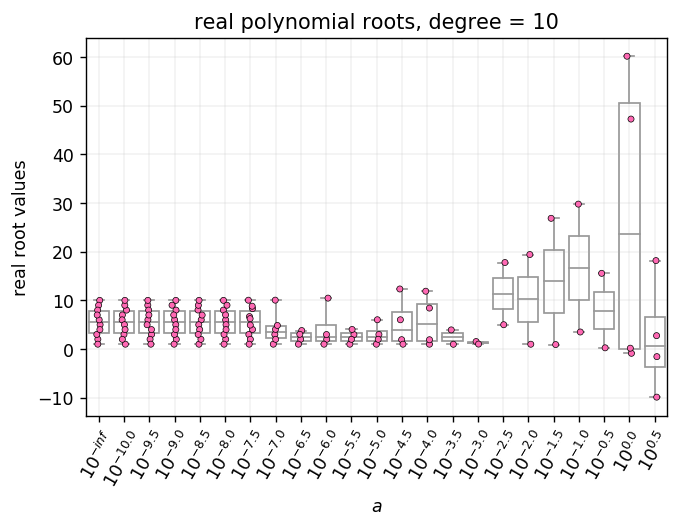

In [12]:
sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3.5, color='hotpink', linewidth=0.4, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, color='white', linewidth=1)
boxplot_xticklabels = boxplot.get_xticklabels()
display_xlabels = [{float(str(label.get_text()))} for label in boxplot_xticklabels]
boxplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a$')
boxplot.set(ylabel='real root values')
boxplot.set(title='real polynomial roots, degree = {}'.format(a_roots_df_melt['roots'].max()+1))

plt.grid(linestyle='-', linewidth=0.15)
plt.show()

$a$ versus all root values

In [13]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff) # all roots
    a_roots.append(trial_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
#a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)

(23, 13)


In [14]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
a_roots_df_melt['real'] = a_roots_df_melt['values'].real
a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag

print(a_roots_df_melt.shape)
a_roots_df_melt.head(10)

(230, 7)


,a,a_exp,a_rounded,roots,values,real,imaginary
0,0.0,-inf,0.0,0,(10.000000000340687+0j),10.0,0.0
23,0.0,-inf,0.0,1,(8.99999999849376+0j),9.0,0.0
115,0.0,-inf,0.0,5,(4.999999999494381+0j),5.0,0.0
46,0.0,-inf,0.0,2,(8.000000002751277+0j),8.0,0.0
92,0.0,-inf,0.0,4,(6.000000001506791+0j),6.0,0.0
69,0.0,-inf,0.0,3,(6.999999997320477+0j),7.0,0.0
184,0.0,-inf,0.0,8,(2.00000000000165+0j),2.0,0.0
161,0.0,-inf,0.0,7,(2.999999999983562+0j),3.0,0.0
138,0.0,-inf,0.0,6,(4.000000000107472+0j),4.0,0.0
207,0.0,-inf,0.0,9,(0.99999999999995+0j),1.0,0.0


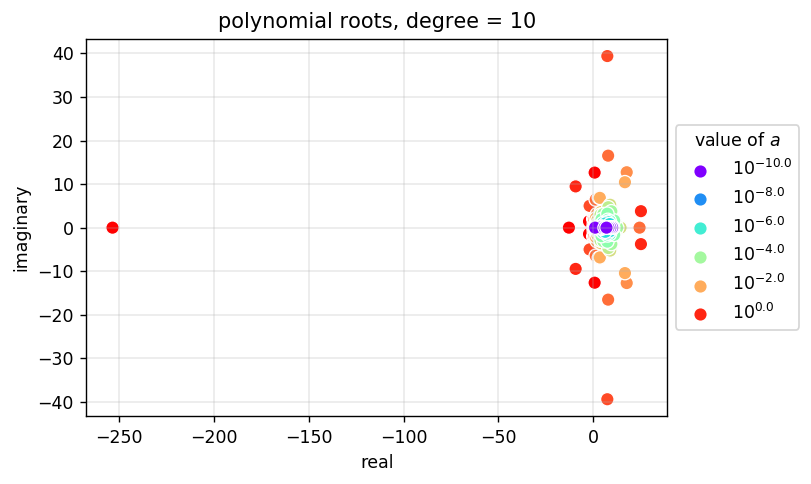

In [15]:
#a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, -10.5) # np.nan, for legend to work
a_roots_df_melt_nan = a_roots_df_melt.replace(float('-inf'), np.nan)
a_roots_df_melt_nan_rev = a_roots_df_melt_nan.iloc[::-1] # reversing, to show purple points on top

cmap = 'rainbow'
#cmap = sns.color_palette('pastel', n_colors=22)
roots_plot = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_melt_nan_rev, 
                             hue='a_exp', legend='full', palette=cmap, s=60)

handles, labels = roots_plot.get_legend_handles_labels()
display_labels = [{float(label)} for label in labels[1::4]]
roots_plot.legend(handles[1::4], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$', 
                  loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
roots_plot.set_title('polynomial roots, degree = {}'.format(a_roots_df_melt['roots'].max()+1))

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistical analyses 

In [16]:
real_avg = a_roots_df_melt.groupby('a_exp')['real'].mean().reset_index().rename(columns={'real':'real_avg'})
real_std = a_roots_df_melt.groupby('a_exp')['real'].std().reset_index().rename(columns={'real':'real_std'})
imag_avg = a_roots_df_melt.groupby('a_exp')['imaginary'].mean().reset_index().rename(columns={'imaginary':'imag_avg'})
imag_std = a_roots_df_melt.groupby('a_exp')['imaginary'].std().reset_index().rename(columns={'imaginary':'imag_std'})

a_roots_df_melt_stats = pd.concat([real_avg, real_std, imag_avg, imag_std], axis=1)
a_roots_df_melt_stats = a_roots_df_melt_stats.loc[:,~a_roots_df_melt_stats.columns.duplicated()]

print(a_roots_df_melt_stats.shape)
a_roots_df_melt_stats.head(10)

(23, 5)


,a_exp,real_avg,real_std,imag_avg,imag_std
0,-inf,5.500000,3.027650,0.000000e+00,0.000000
1,-10.0,5.500000,3.027650,0.000000e+00,0.000000
2,-9.5,5.500000,3.027650,0.000000e+00,0.000000
3,-9.0,5.500000,3.027650,0.000000e+00,0.000000
4,-8.5,5.500000,3.027650,0.000000e+00,0.000000
5,-8.0,5.500000,3.027650,0.000000e+00,0.000000
6,-7.5,5.500000,3.027654,0.000000e+00,0.000000
7,-7.0,5.499999,3.027635,0.000000e+00,0.000000
8,-6.5,5.500000,3.086795,-2.220446e-17,0.601333
9,-6.0,5.500004,3.134592,0.000000e+00,0.811582


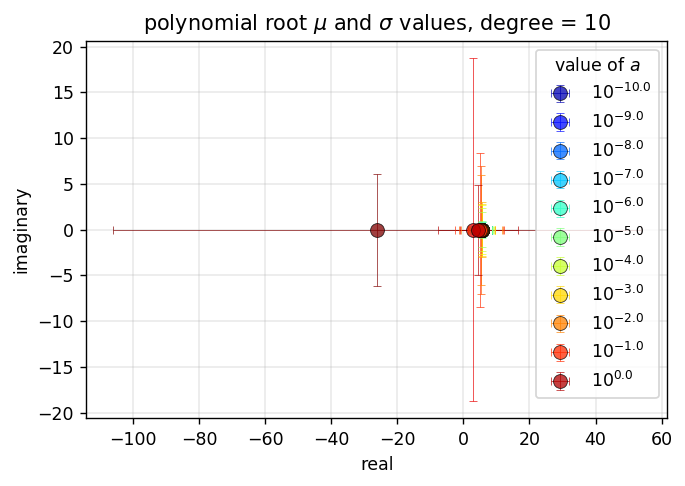

In [17]:
x, y = list(a_roots_df_melt_stats['real_avg']), list(a_roots_df_melt_stats['imag_avg'])
x_err, y_err = list(a_roots_df_melt_stats['real_std']), list(a_roots_df_melt_stats['imag_std'])
labels = list(a_roots_df_melt_stats['a_exp'])
float_labels = [{float(label)} for label in labels]
display_labels = ['$10^{}$'.format(label) for label in float_labels]

#plt.errorbar(x, y, yerr=y_err, xerr=x_err, elinewidth=0.5, capsize=2.5, ms=4, 
#             markerfacecolor='black', markeredgecolor='black', fmt='o', ecolor='blue')

n = len(x)
colors = pl.cm.jet(np.linspace(0,1,n))
for i in range(n):
    plt.errorbar(x[i], y[i], yerr=y_err[i], xerr=x_err[i], elinewidth=0.5, capsize=2.5, ms=8,
                 markerfacecolor=colors[i], markeredgecolor='black', markeredgewidth=0.5, 
                 fmt='o', ecolor=colors[i], alpha=0.75,
                 label='_nolegend_' if (i+1)%2 != 0 else display_labels[i]) #label=display_labels[i]
    
plt.xlabel('real')
plt.ylabel('imaginary')
plt.title('polynomial root $\mu$ and $\sigma$ values, degree = {}'.format(a_roots_df_melt['roots'].max()+1)) # mean and standard deviations of roots by 'a' value
plt.grid(linestyle='-', linewidth=0.25)
plt.legend(title='value of $a$')
plt.show()

In [18]:
stats_melt = pd.melt(a_roots_df_melt_stats, id_vars='a_exp', var_name='statistic', value_name='val')
print(stats_melt.shape)
stats_melt.head()

(92, 3)


,a_exp,statistic,val
0,-inf,real_avg,5.5
1,-10.0,real_avg,5.5
2,-9.5,real_avg,5.5
3,-9.0,real_avg,5.5
4,-8.5,real_avg,5.5


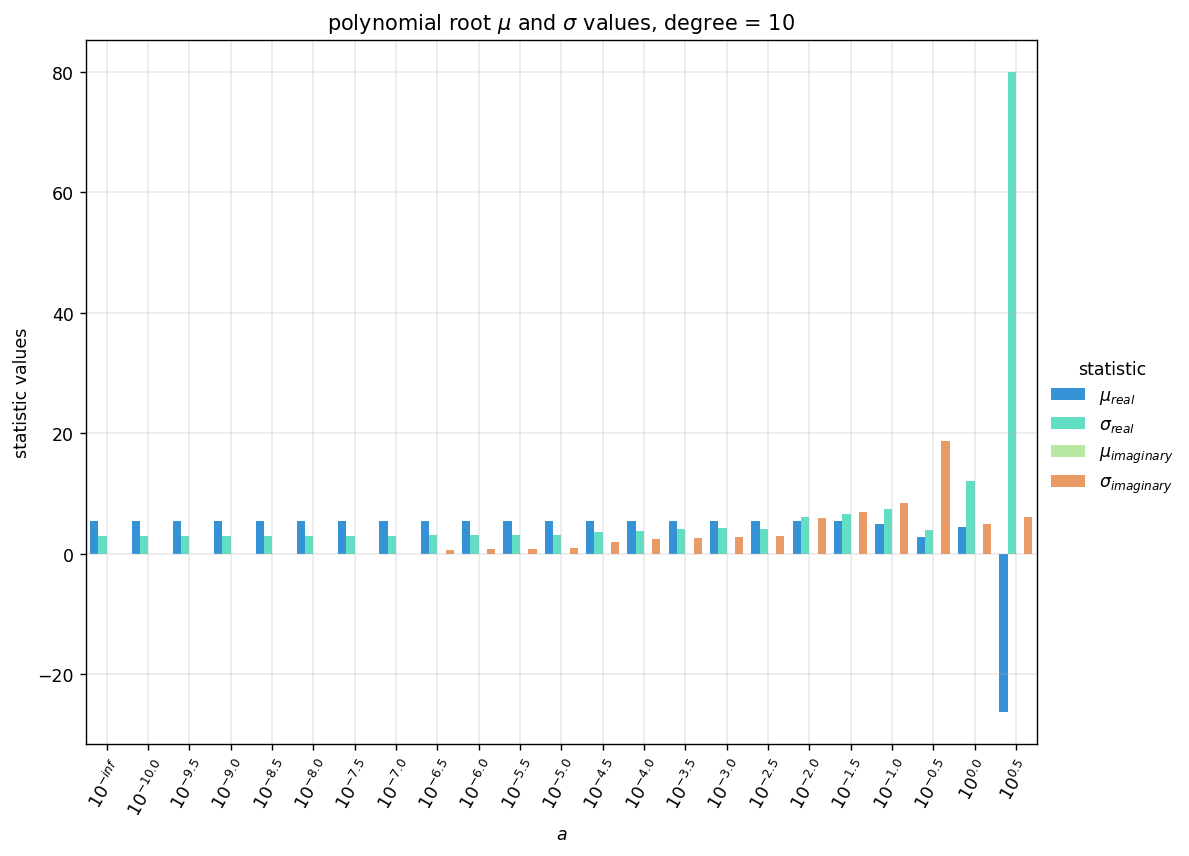

In [19]:
# for legend
stats_melt = stats_melt.replace('real_avg', '$\mu_{real}$')
stats_melt = stats_melt.replace('real_std', '$\sigma_{real}$')
stats_melt = stats_melt.replace('imag_avg', '$\mu_{imaginary}$')
stats_melt = stats_melt.replace('imag_std', '$\sigma_{imaginary}$')

# 'boxplot/display_xticklabels' because 'FacetGrid' object has no attribute 'get_xticklabels' 
barplot = sns.catplot(x='a_exp', y='val', hue='statistic', data=stats_melt, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
barplot.set(xlabel='$a$')
barplot.set(ylabel='statistic values')
barplot.set(title='polynomial root $\mu$ and $\sigma$ values, degree = {}'.format(a_roots_df_melt['roots'].max()+1))

sns.despine(top=False, right=False)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Multiple runs for single $a$ value

In [20]:
#a_exp_multiple = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_exp_multiple = list(np.arange(-10, 1.25, 0.25)) # consecutive numbers
a_vals_multiple = [0] + list(map(lambda x:pow(10, x), a_exp_multiple))

In [21]:
def a_scatterplot(a, num_runs):
    a_exponent = np.log10(a)
    a_roots_df_meta = pd.DataFrame()
    for num in range(num_runs):
        a_roots = []
        coeff = perturb_coeff(a, coeff_ck)
        roots = roots_perturb_coeff(coeff) # all roots
        a_roots.append(roots)
        a_roots_df = pd.DataFrame(a_roots)
        a_roots_df.insert(0, 'a', a)
        a_roots_df.insert(0, 'a_exp', a_exponent)
        a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp'], value_name='values', var_name='roots')
        a_roots_df_melt['real'] = a_roots_df_melt['values'].real
        a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag
        a_roots_df_melt['run'] = num + 1
        #print(a_roots_df_melt)
        a_roots_df_meta = pd.concat([a_roots_df_meta, a_roots_df_melt])
    
    g = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_meta, style='run', color='black', 
                        legend='full', palette='rainbow', s=75)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.grid(linestyle='-', linewidth=0.25)
    plt.title('{} runs for $a = 10^{}$, degree = {}'.format(num_runs, {a_exponent}, a_roots_df_meta['roots'].max()+1))
    plt.show()

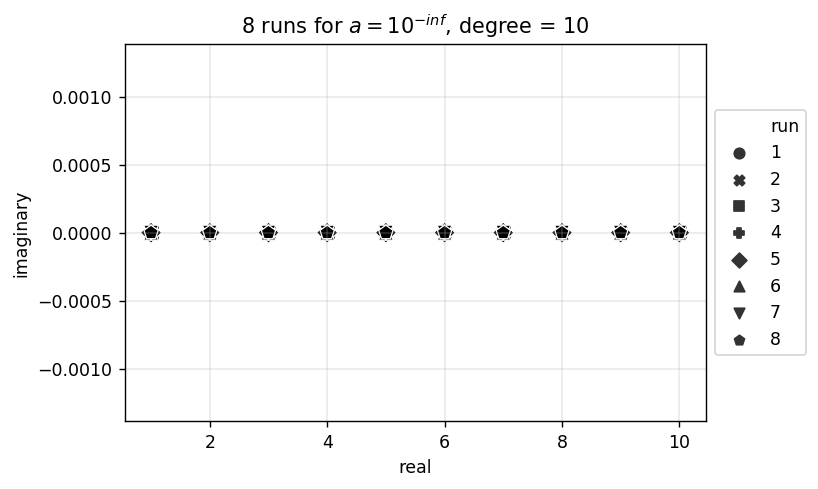

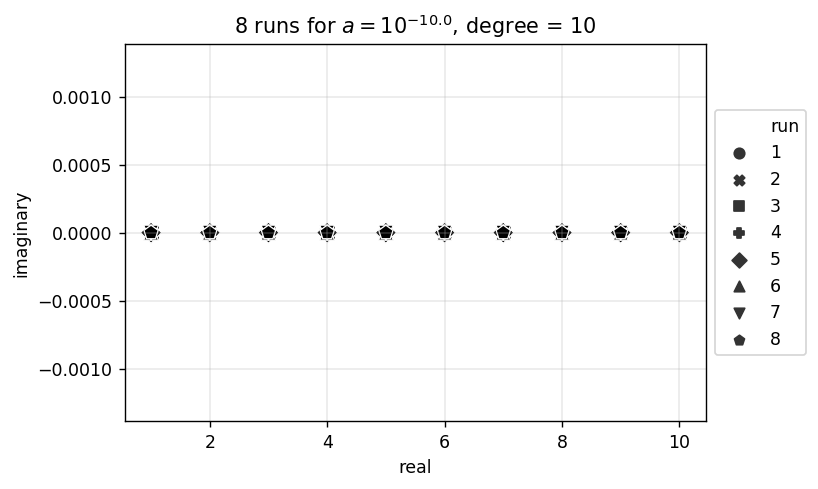

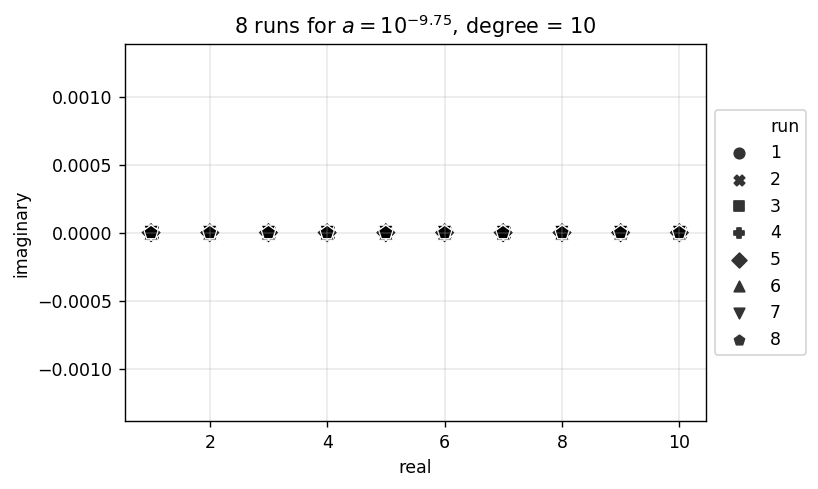

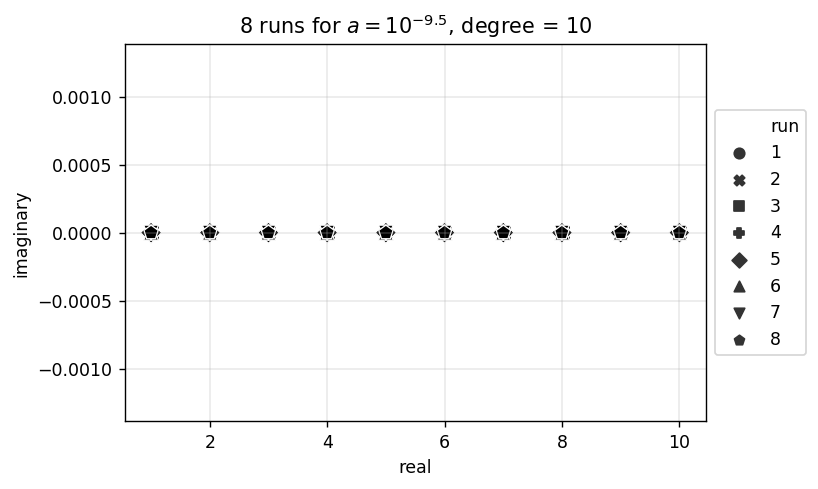

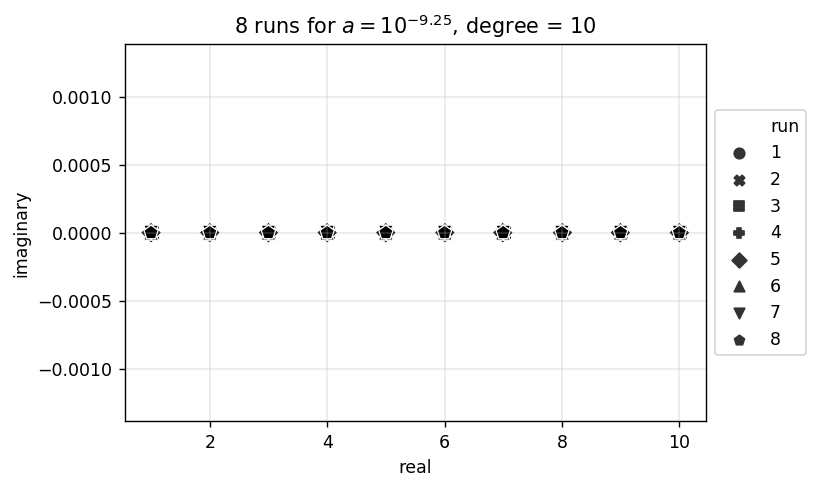

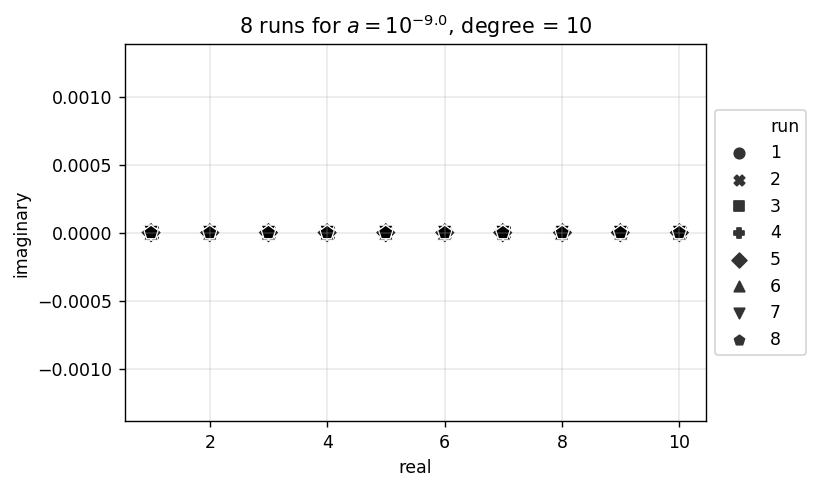

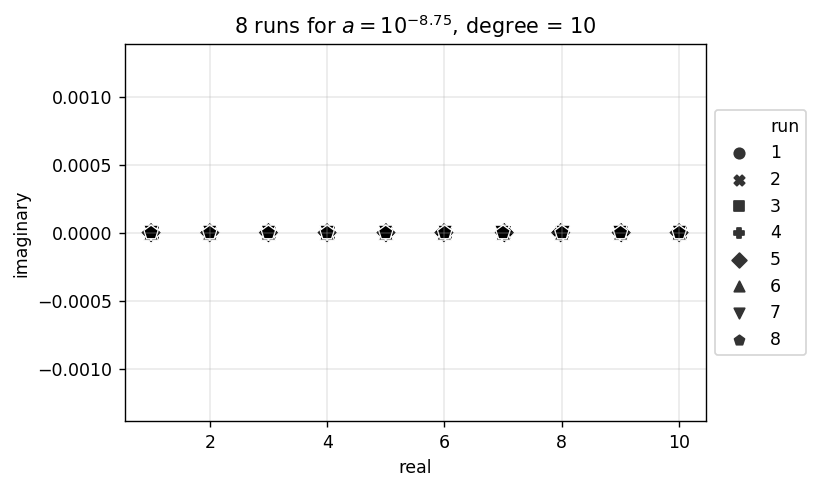

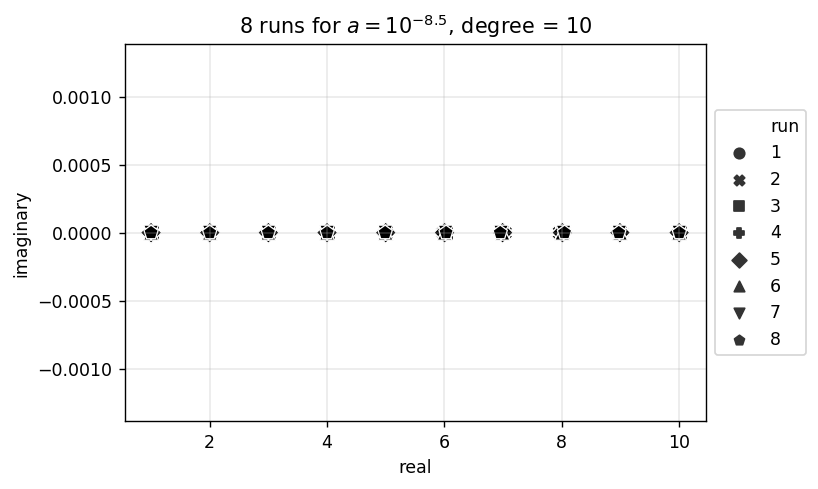

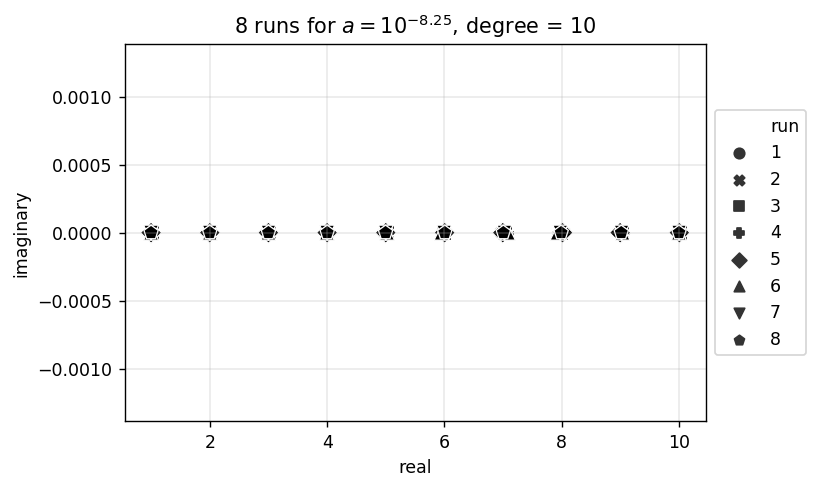

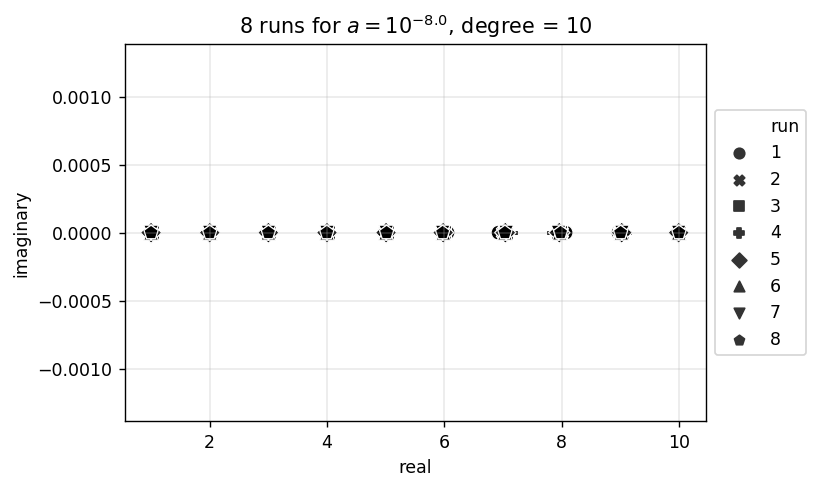

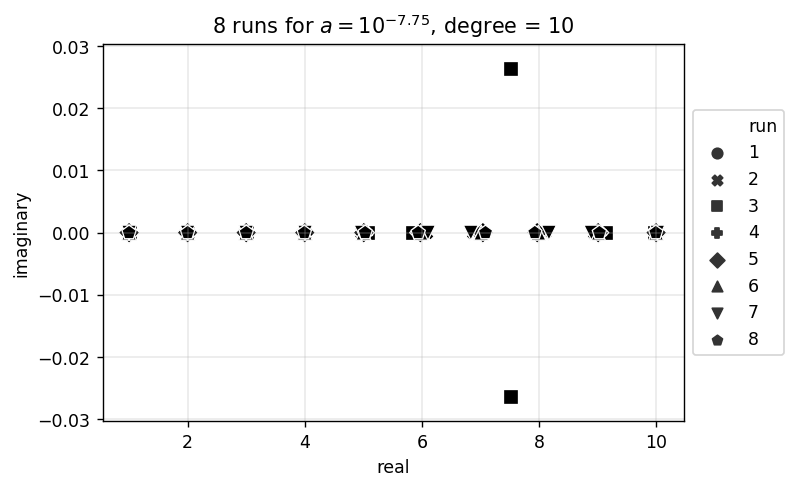

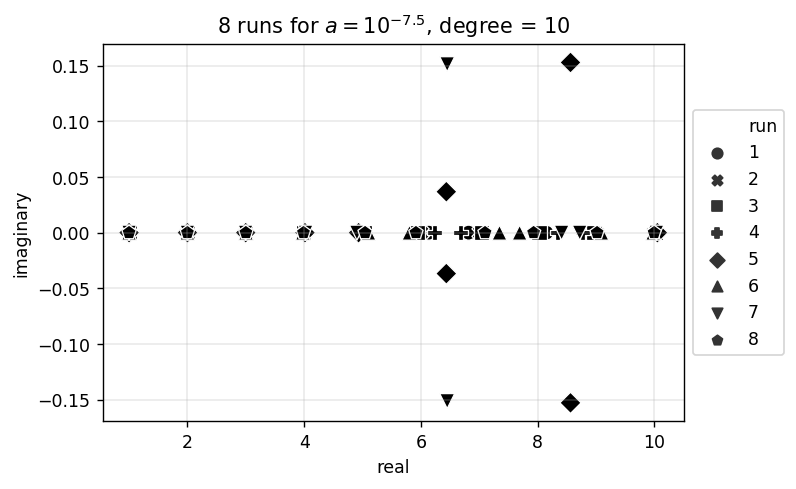

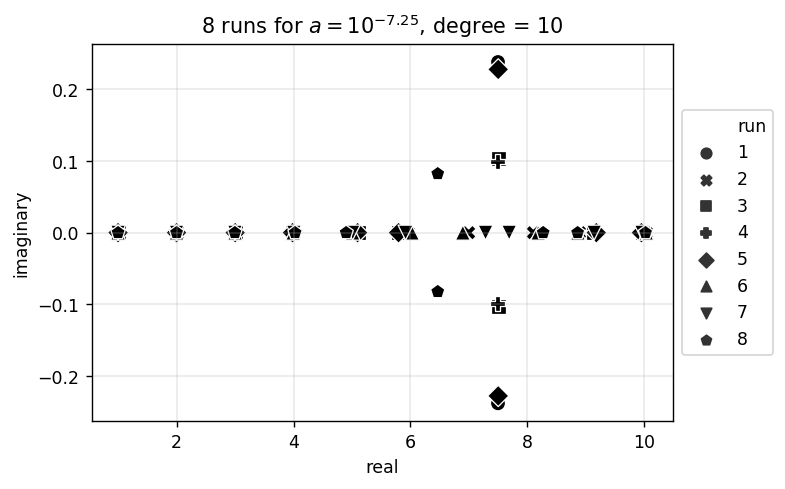

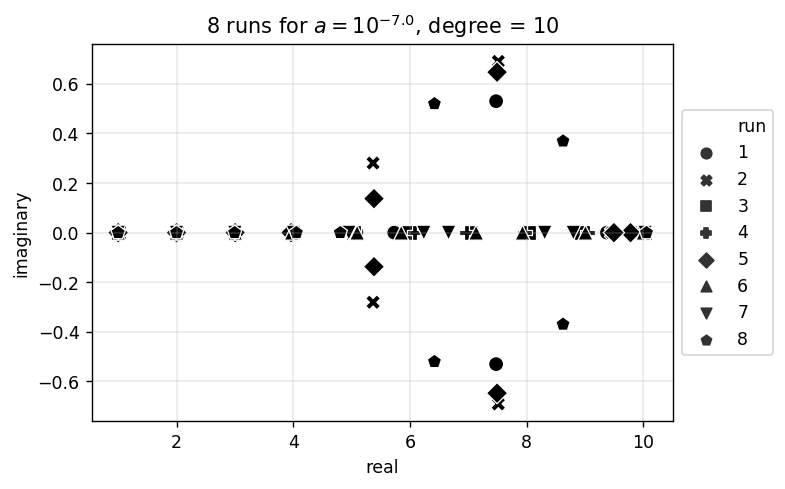

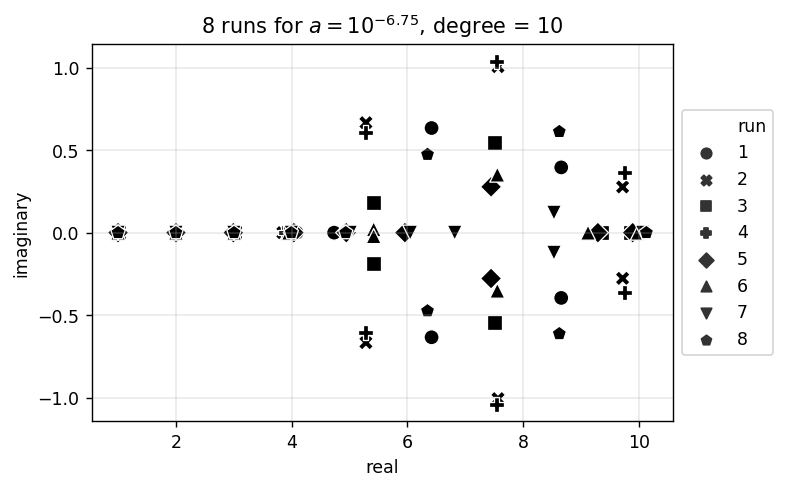

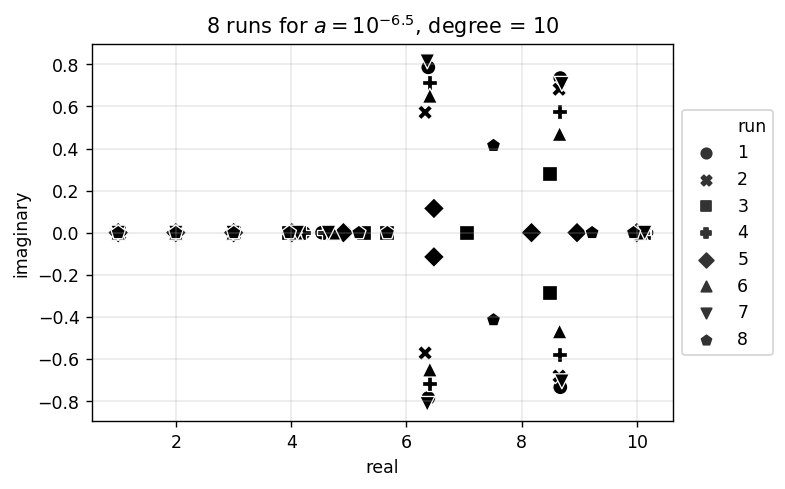

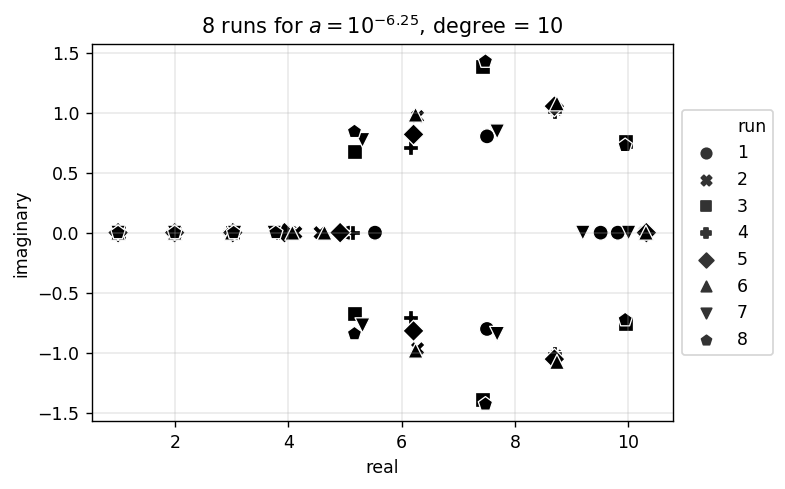

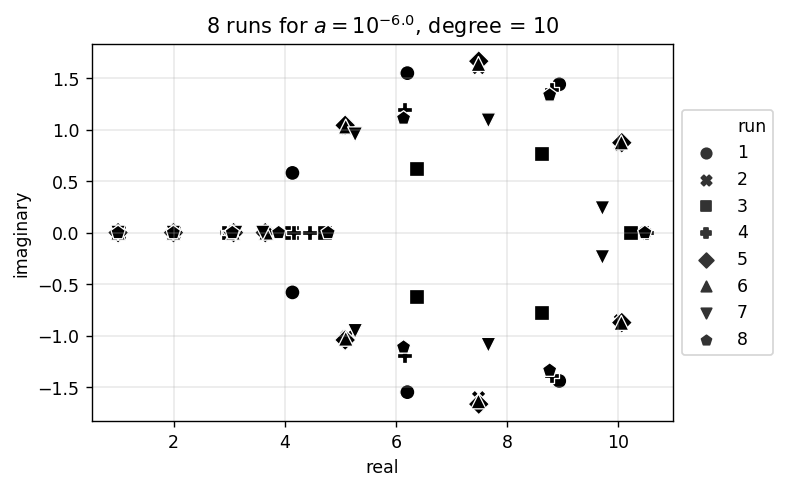

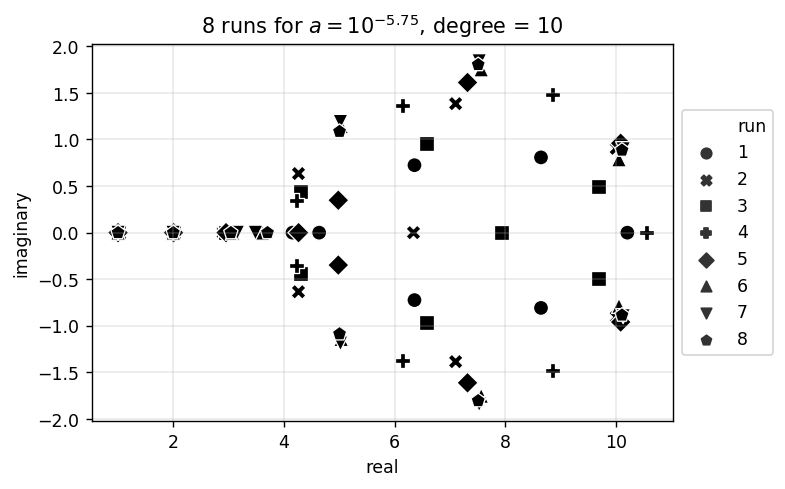

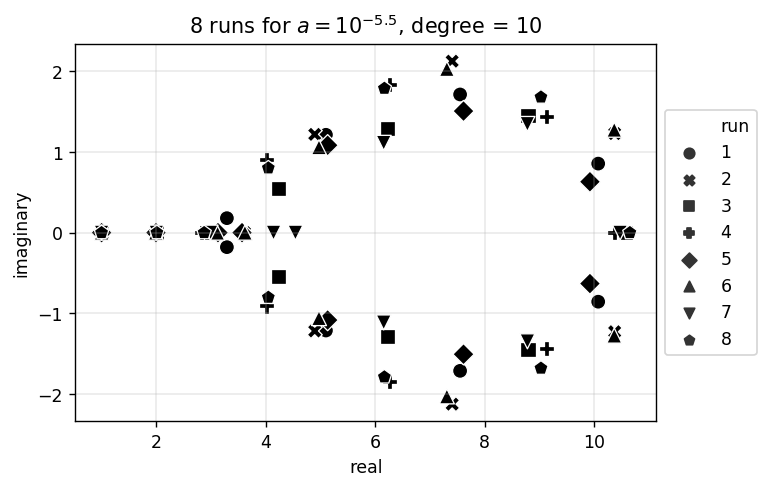

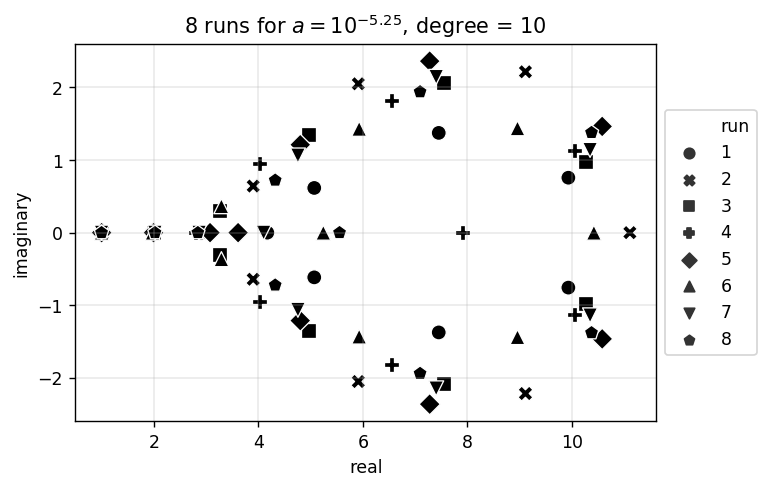

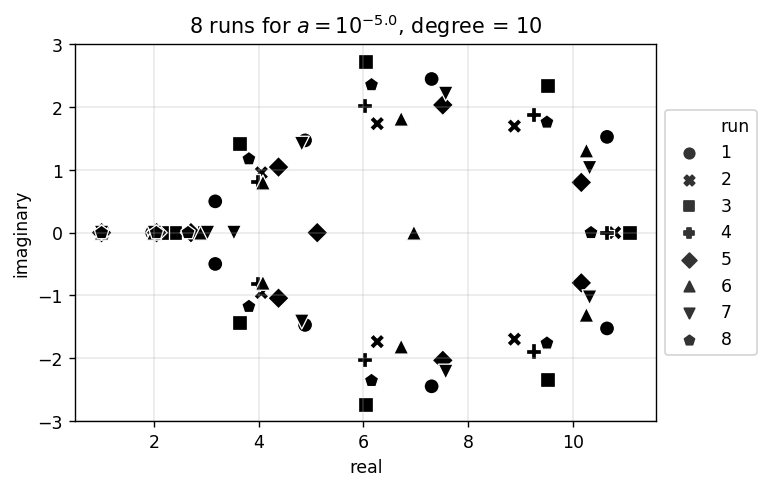

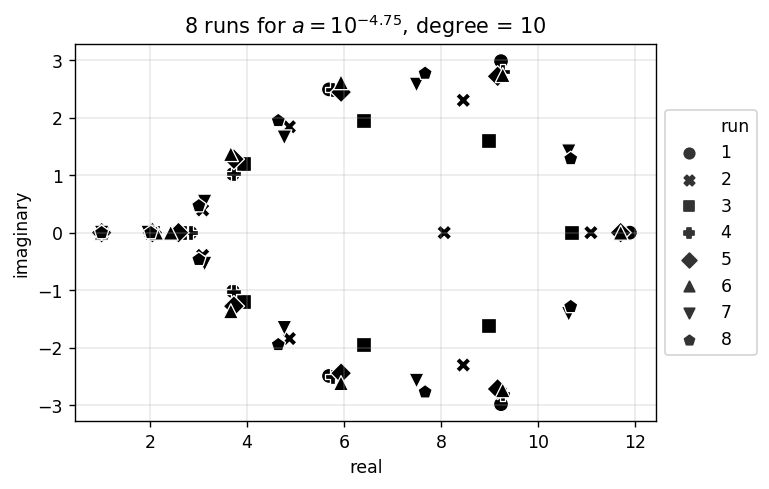

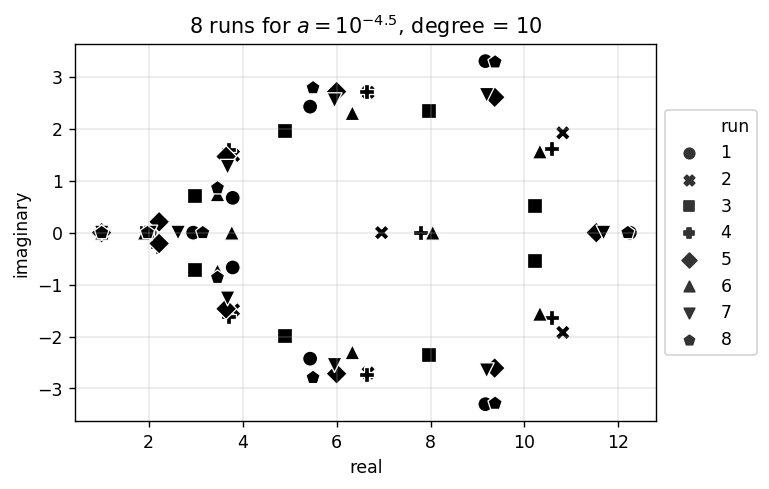

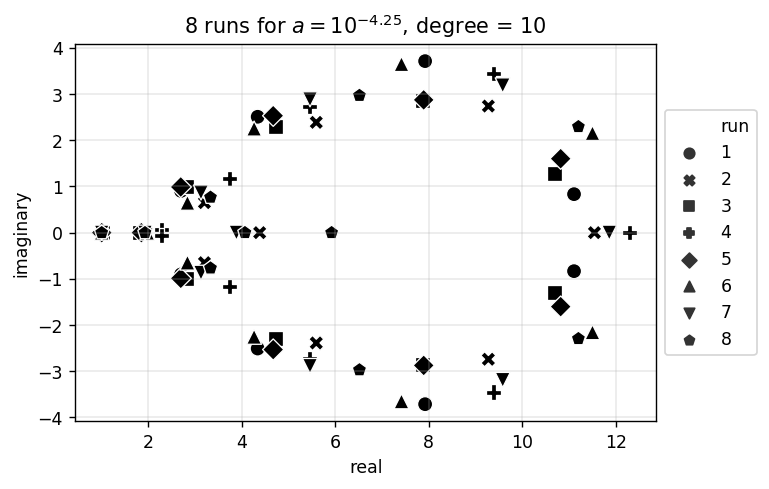

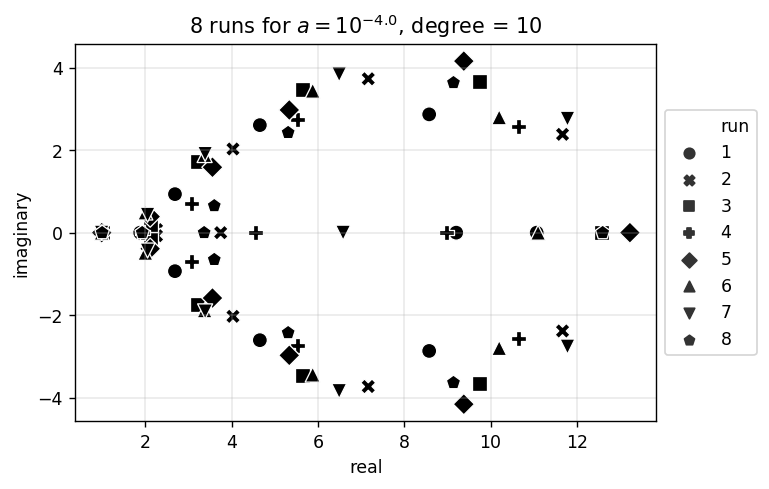

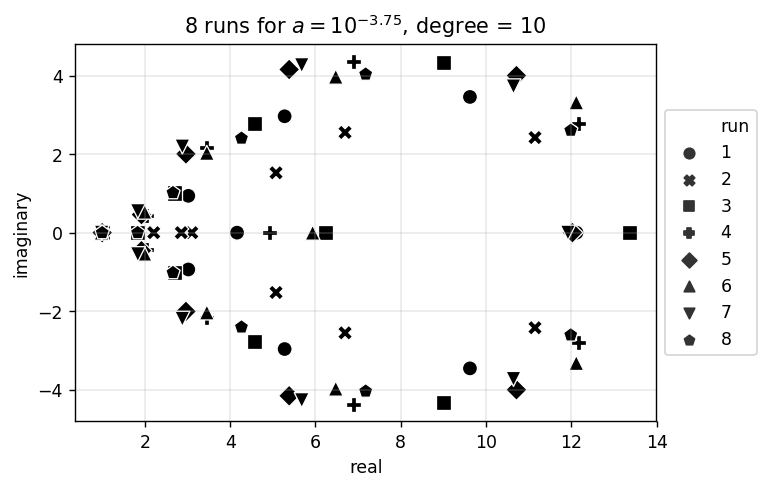

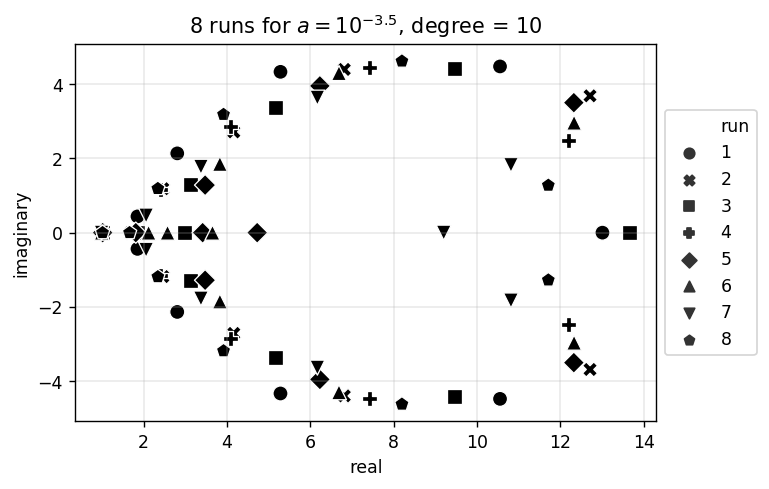

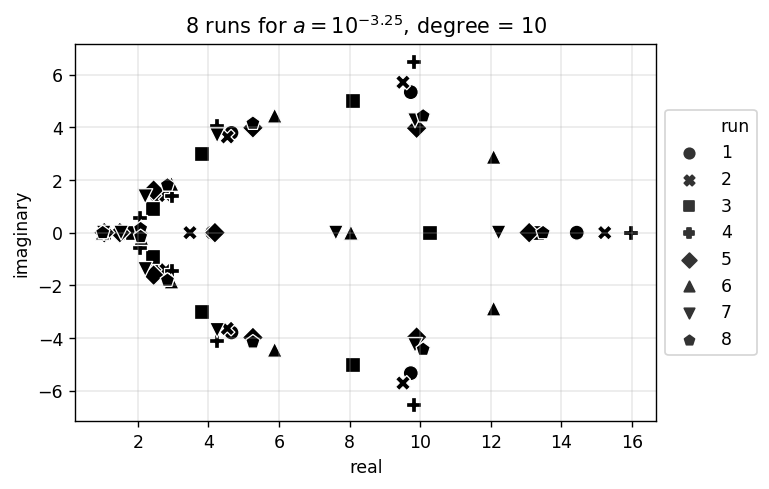

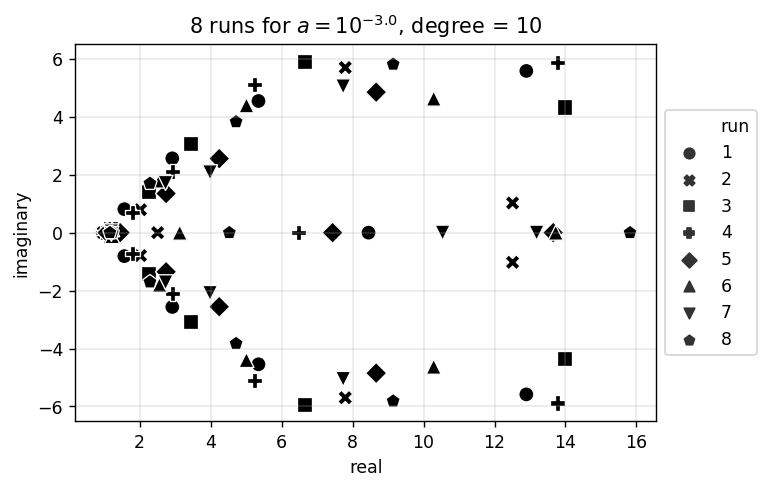

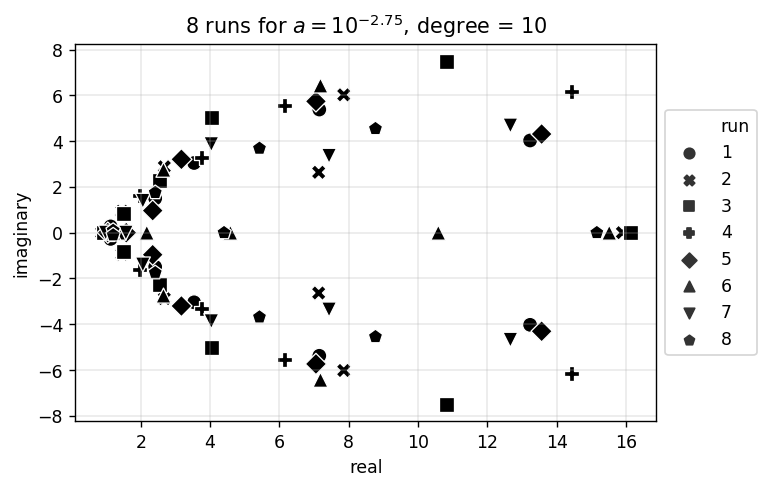

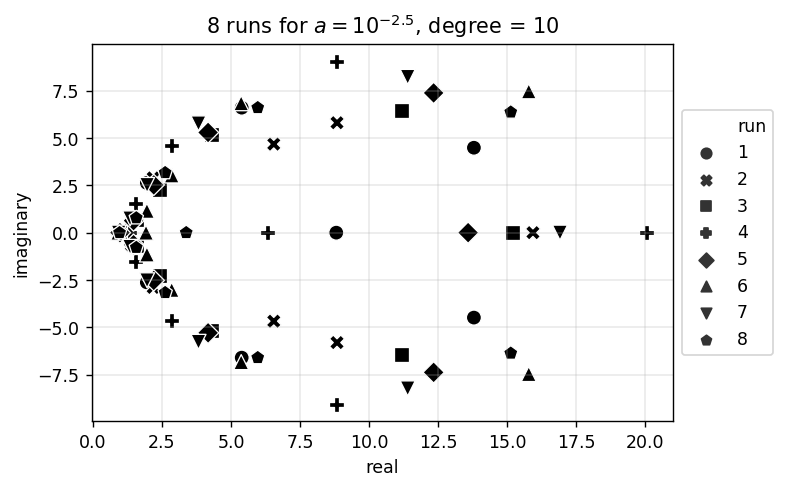

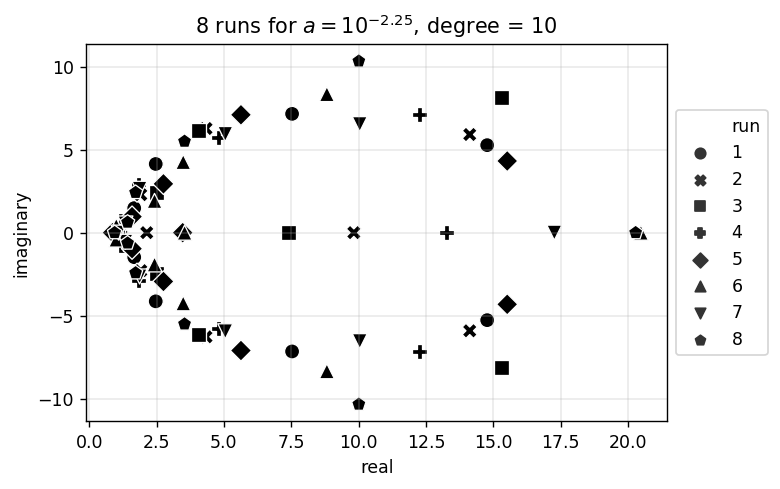

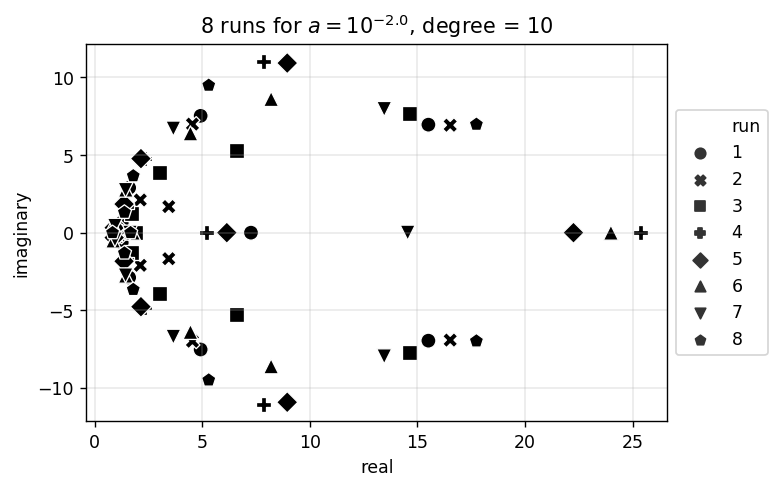

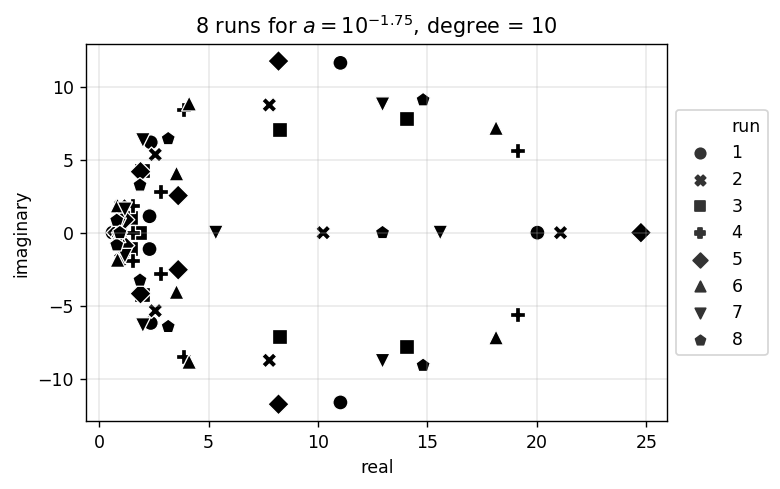

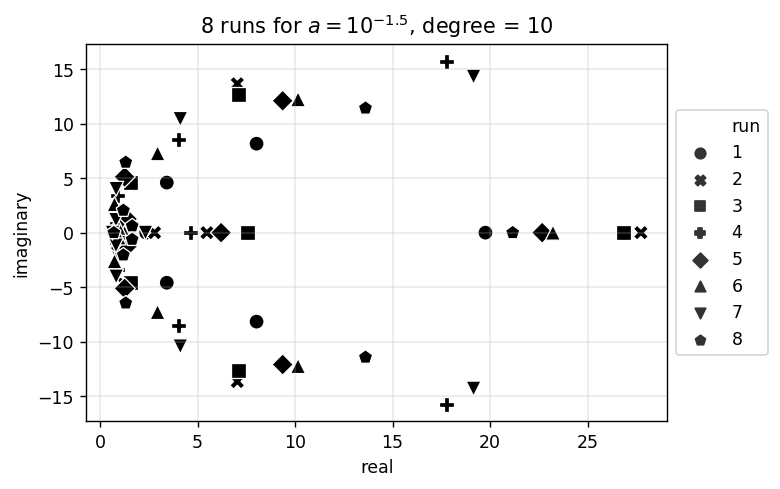

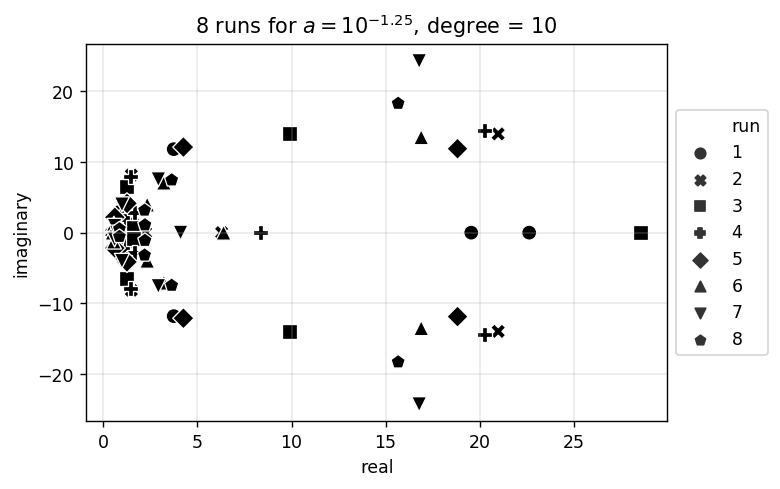

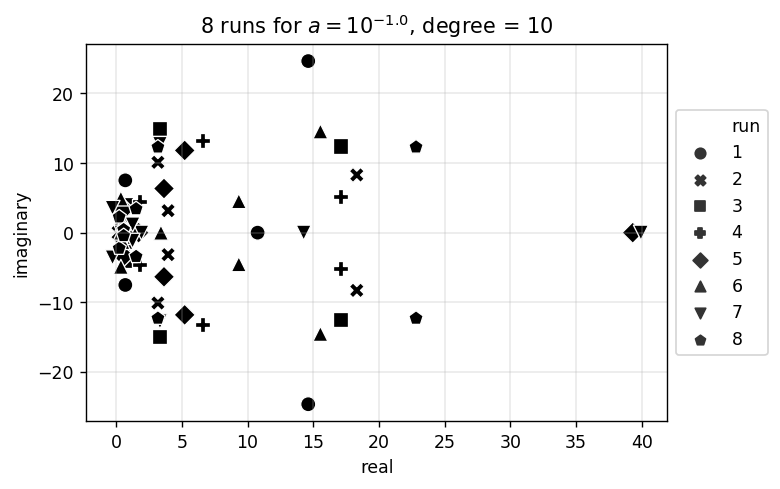

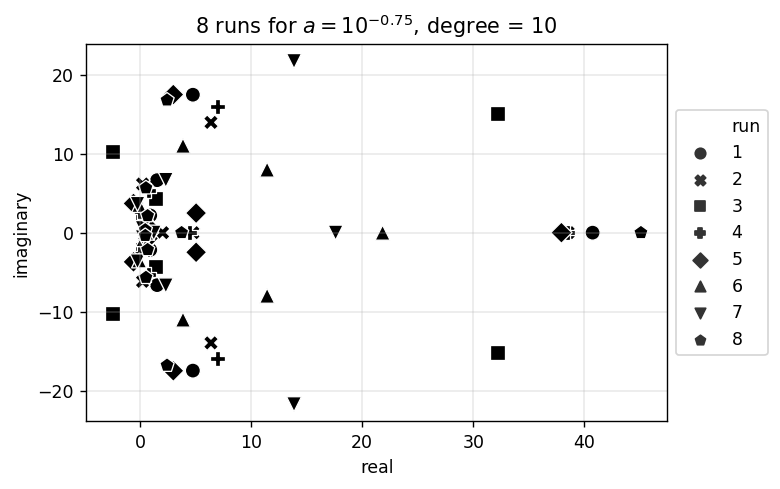

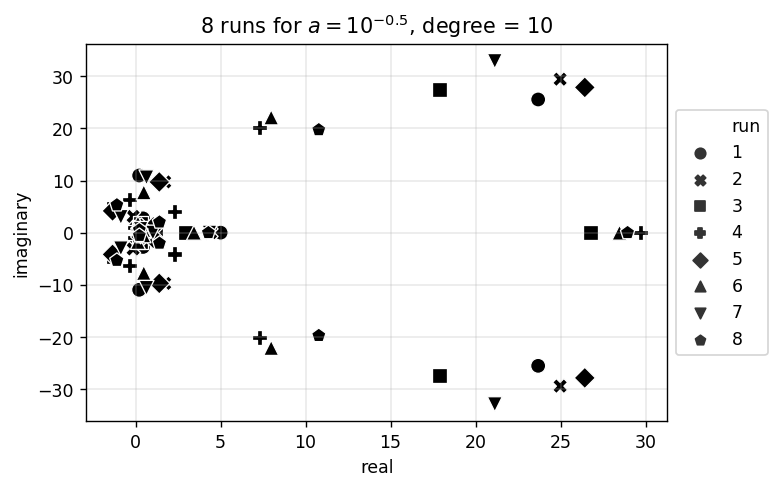

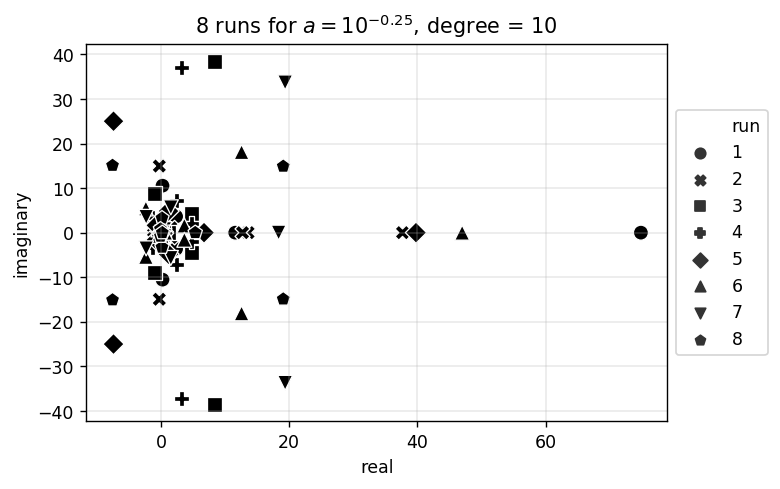

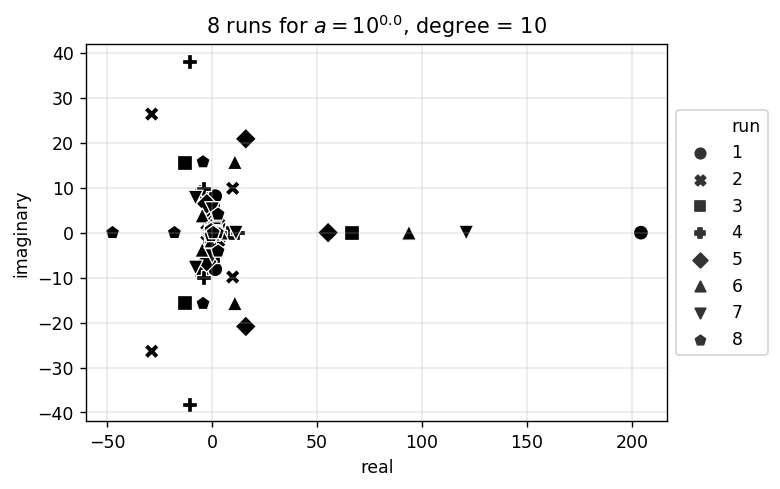

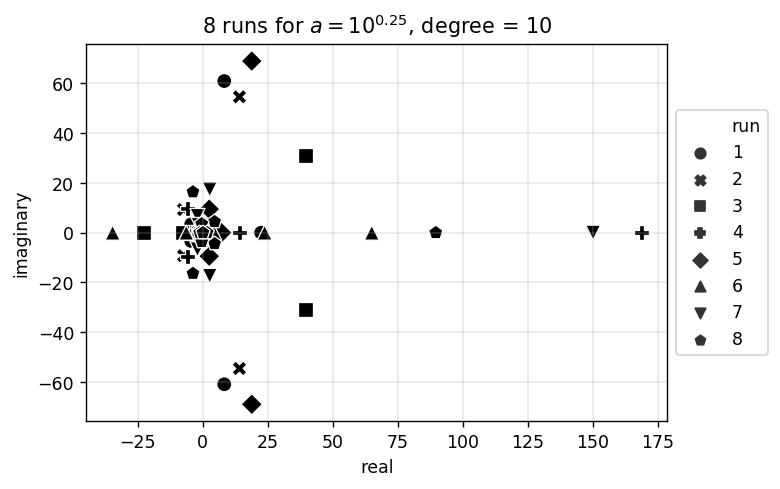

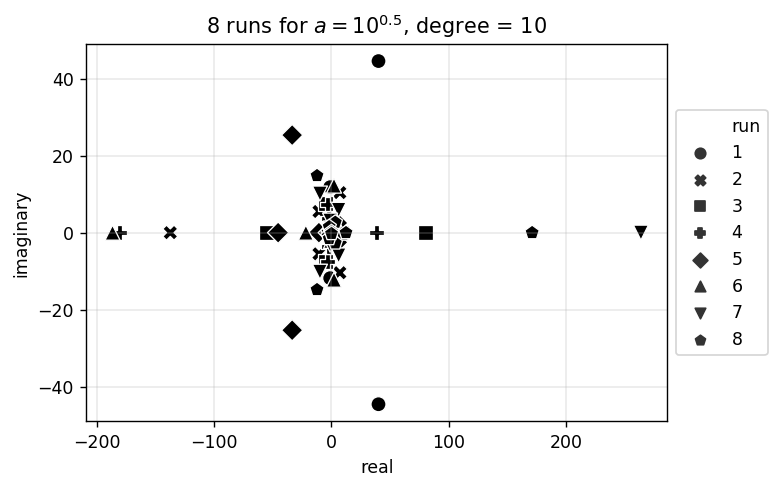

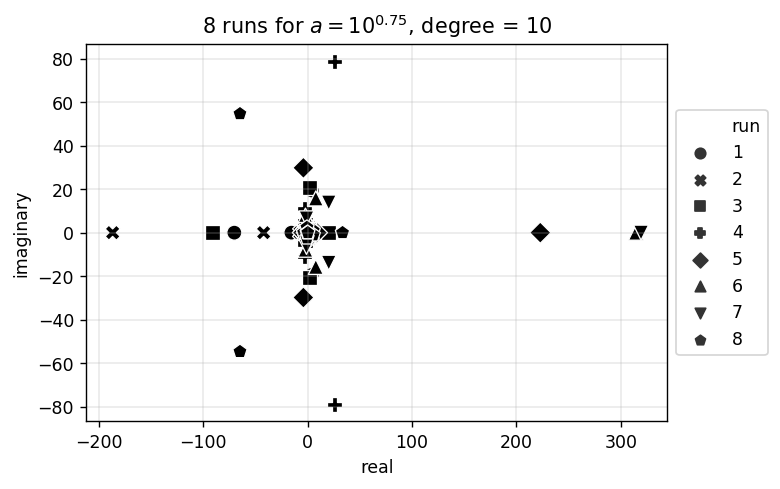

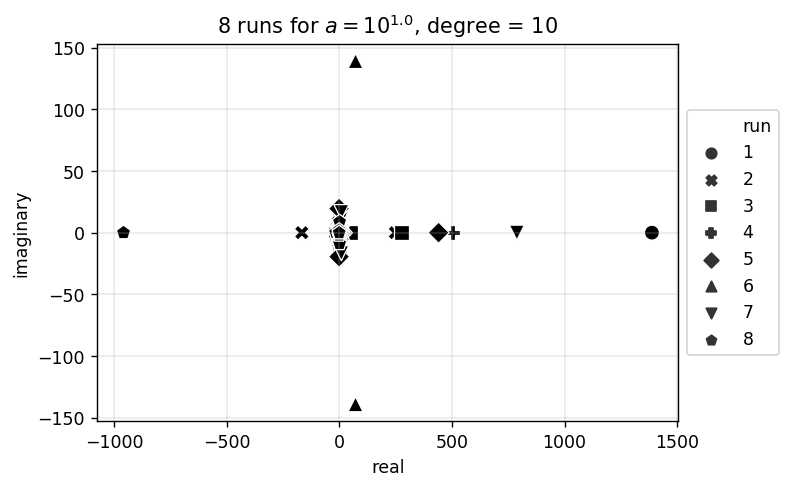

In [22]:
for a in a_vals_multiple:
    num_runs = 8 # maximum number of sns.scatterplot markers
    runs_plot = a_scatterplot(a, num_runs)

### Multiple runs for multiple $a$ values

In [23]:
def a_runs(a, num_runs):
    a_exponent = np.log10(a)
    a_roots_df_meta = pd.DataFrame()
    for num in range(num_runs):
        a_roots = []
        coeff = perturb_coeff(a, coeff_ck)
        roots = roots_perturb_coeff(coeff) # all roots
        a_roots.append(roots)
        a_roots_df = pd.DataFrame(a_roots)
        a_roots_df.insert(0, 'a', a)
        a_roots_df.insert(0, 'a_exp', a_exponent)
        a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp'], value_name='values', var_name='roots')
        a_roots_df_melt['real'] = a_roots_df_melt['values'].real
        a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag
        a_roots_df_melt['run'] = num + 1
        a_roots_df_meta = pd.concat([a_roots_df_meta, a_roots_df_melt])
    return a_roots_df_meta

In [24]:
a_exp_multiple = list(np.arange(-10, 0, 1.0)) # consecutive numbers
a_vals_multiple = [0] + list(map(lambda x:pow(10, x), a_exp_multiple))

a_runs_df = pd.DataFrame()
num_runs = 100
for a in a_vals_multiple: 
    single_a_runs = a_runs(a, num_runs)
    a_runs_df = pd.concat([a_runs_df, single_a_runs])

a_runs_df['original_root'] = a_runs_df['roots'].apply(lambda x: a_runs_df['roots'].max() + 1 - x)
print(a_runs_df.shape)
a_runs_df.head(10)

(11000, 8)


,a,a_exp,roots,values,real,imaginary,run,original_root
0,0.0,-inf,0,(10.000000000340687+0j),10.0,0.0,1,10
1,0.0,-inf,1,(8.99999999849376+0j),9.0,0.0,1,9
2,0.0,-inf,2,(8.000000002751277+0j),8.0,0.0,1,8
3,0.0,-inf,3,(6.999999997320477+0j),7.0,0.0,1,7
4,0.0,-inf,4,(6.000000001506791+0j),6.0,0.0,1,6
5,0.0,-inf,5,(4.999999999494381+0j),5.0,0.0,1,5
6,0.0,-inf,6,(4.000000000107472+0j),4.0,0.0,1,4
7,0.0,-inf,7,(2.999999999983562+0j),3.0,0.0,1,3
8,0.0,-inf,8,(2.00000000000165+0j),2.0,0.0,1,2
9,0.0,-inf,9,(0.99999999999995+0j),1.0,0.0,1,1


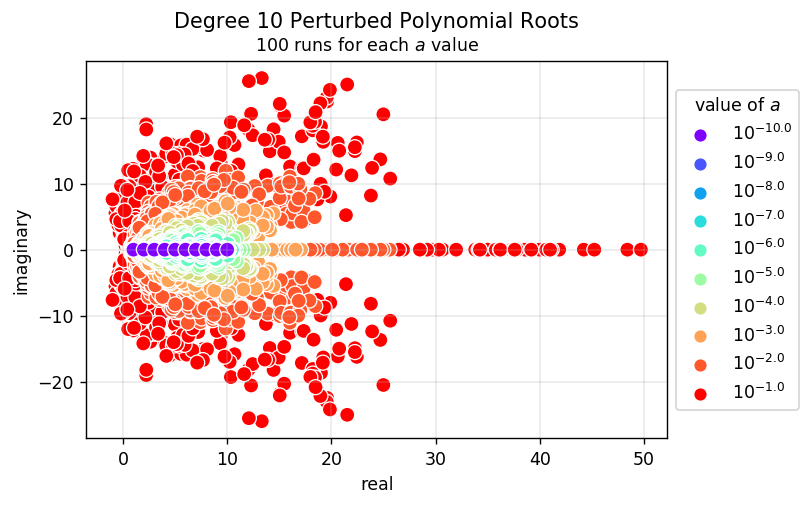

In [25]:
a_runs_df_nan = a_runs_df.replace(float('-inf'), np.nan) # np.nan, for legend to work
a_runs_df_nan_rev = a_runs_df_nan.iloc[::-1] # reversing, to show purple points on top

p = sns.scatterplot(x='real', y='imaginary', data=a_runs_df_nan_rev, hue='a_exp', #size='a_exp',
                    legend='full', palette='rainbow', s=75)

# legend
handles, labels = p.get_legend_handles_labels()
display_labels = [{float(label)} for label in labels[1:]]
p.legend(handles[1:], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$',
        loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#p.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.grid(linestyle='-', linewidth=0.25)
plt.title('Degree {} Perturbed Polynomial Roots'.format(a_runs_df['roots'].max()+1), y=1.06)
plt.suptitle('{} runs for each $a$ value'.format(num_runs), fontsize=10, y=0.93)
plt.show()

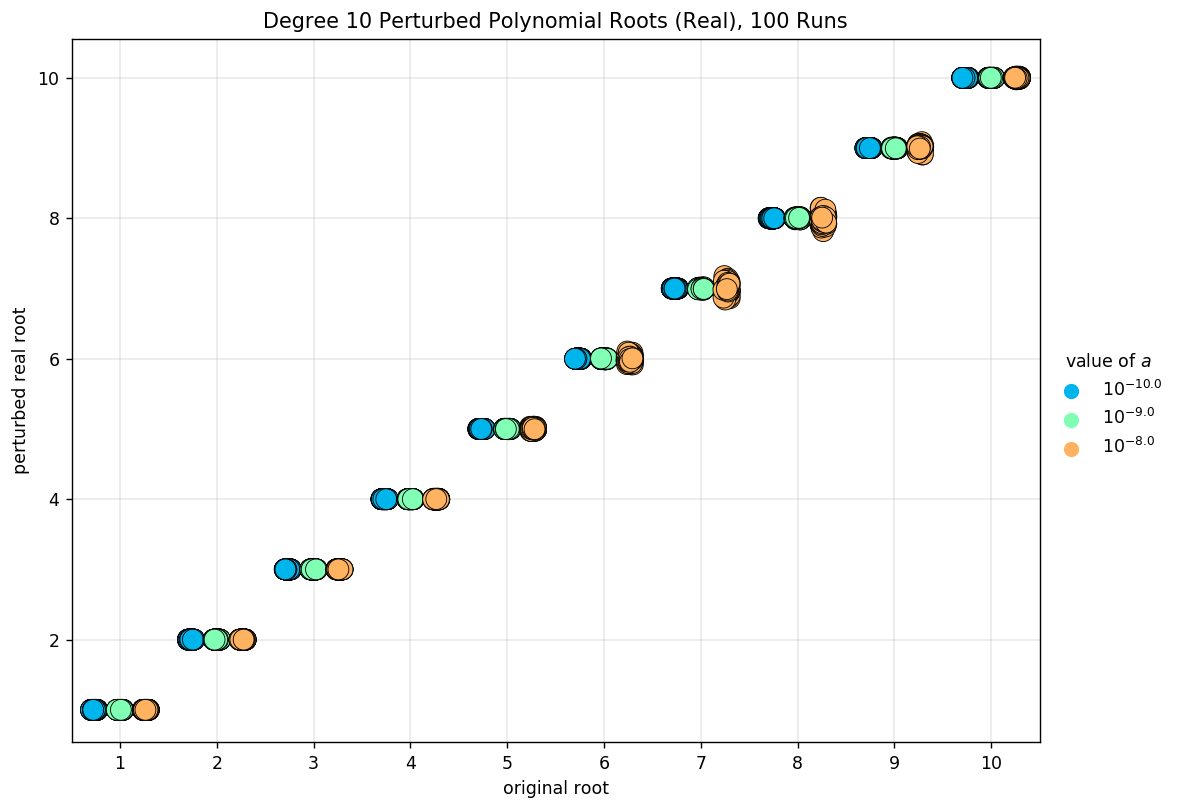

In [26]:
#a_select = [-10, -4, -2, -1]
#a_select = [-10, -8, -6, -4, -2, -1]
a_select = [-10, -9, -8]
#a_select = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
a_runs_df_select = a_runs_df.loc[a_runs_df['a_exp'].isin(a_select)]
a_runs_df_select = a_runs_df_select.rename(columns={'a_exp':'value of $a$'})

# legend
for a in a_select:
    a_runs_df_select = a_runs_df_select.replace(a, '$10^{}$'.format({float(a)}))

spread_plot = sns.catplot(x='original_root', y='real', hue='value of $a$', data=a_runs_df_select, 
                          dodge=True, palette='rainbow', linewidth=0.5, edgecolor='black', 
                          s=12, height=6.4, aspect=4/3)
spread_plot.set(xlabel='original root')
spread_plot.set(ylabel='perturbed real root')

sns.despine(top=False, right=False)
plt.title('Degree {} Perturbed Polynomial Roots (Real), {} Runs'.format(a_runs_df['original_root'].max(), num_runs))
#plt.suptitle('{} runs for each $a$ value'.format(num_runs), fontsize=10, y=0.93)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistics for distributions of real roots

In [27]:
a_runs_df_stats = a_runs_df[['a_exp', 'original_root', 'real']]

a_runs_df_mean = a_runs_df_stats.groupby(['a_exp', 'original_root']).mean().rename(columns={'real':'$\mu_{real}$'})
a_runs_df_std = a_runs_df_stats.groupby(['a_exp', 'original_root']).std().rename(columns={'real':'$\sigma_{real}$'})

# RMSE
a_runs_df_RMSE = a_runs_df_stats
a_runs_df_RMSE['RMSE'] = (a_runs_df_RMSE['original_root'] - a_runs_df_RMSE['real'])**2
a_runs_df_RMSE = a_runs_df_stats[['a_exp', 'original_root', 'RMSE']].groupby(['a_exp', 'original_root']).mean()
a_runs_df_RMSE['RMSE'] = (a_runs_df_RMSE['RMSE'])**0.5

a_runs_df_stats_merged = pd.concat([a_runs_df_mean, a_runs_df_std, a_runs_df_RMSE], axis=1)
a_runs_df_stats_merged = a_runs_df_stats_merged.loc[:,~a_runs_df_stats_merged.columns.duplicated()]

print(a_runs_df_stats_merged.shape)
a_runs_df_stats_merged.head(10)

(110, 3)


$\mu_{real}$  $\sigma_{real}$          RMSE
a_exp original_root                                             
-inf  1                       1.0              0.0  4.996004e-14
      2                       2.0              0.0  1.649791e-12
      3                       3.0              0.0  1.643796e-11
      4                       4.0              0.0  1.074723e-10
      5                       5.0              0.0  5.056187e-10
      6                       6.0              0.0  1.506791e-09
      7                       7.0              0.0  2.679523e-09
      8                       8.0              0.0  2.751277e-09
      9                       9.0              0.0  1.506240e-09
      10                     10.0              0.0  3.406875e-10

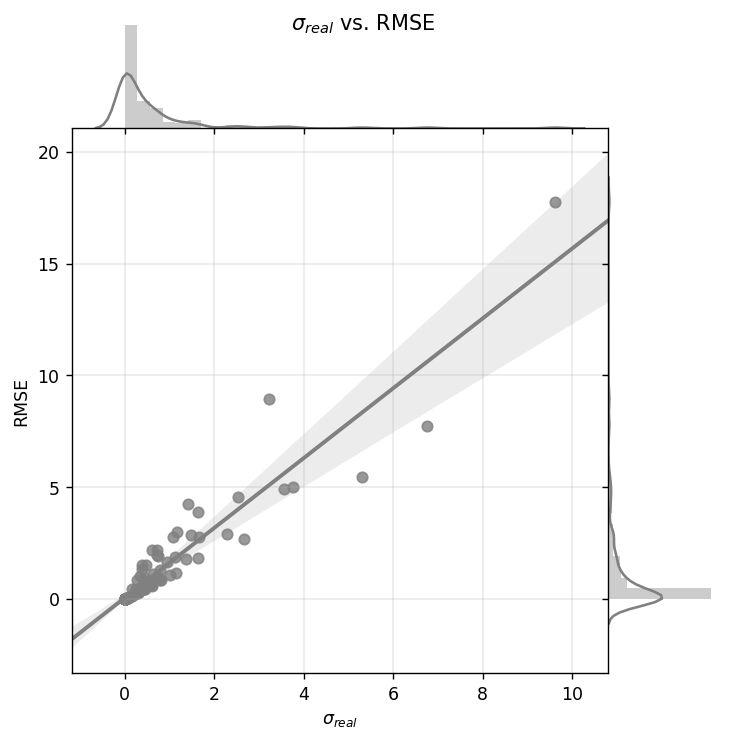

In [28]:
jointplot = sns.jointplot(x='$\sigma_{real}$', y='RMSE', data=a_runs_df_stats_merged, space=0, kind='reg', color='gray')
jointplot.fig.suptitle('$\sigma_{real}$ vs. RMSE')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Critical $a$ values
Observed from past experiments over multiple polynomial degrees

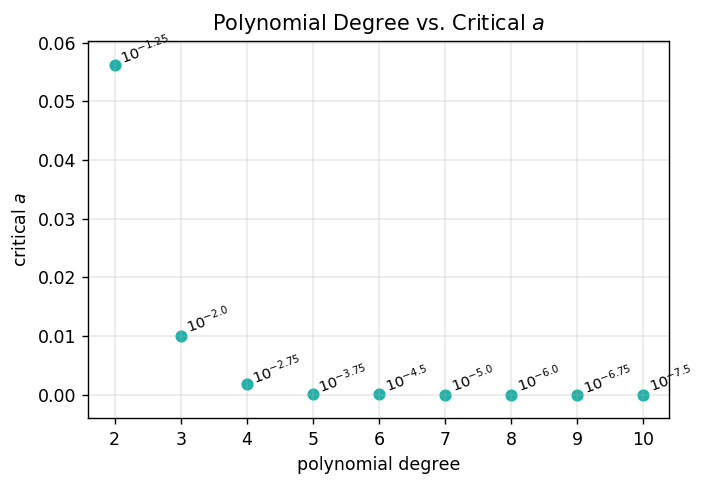

In [29]:
exp_critical_avals = [-1.25, -2.0, -2.75, -3.75, -4.5, -5.0, -6.0, -6.75, -7.5]
critical_avals = {'polynomial degree': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
                  'critical $a$': [10**-1.25, 10**-2, 10**-2.75, 10**-3.75, 10**-4.5, 
                                   10**-5.0, 10**-6.0, 10**-6.75, 10**-7.5]}
critical_avals_df = pd.DataFrame.from_dict(critical_avals)

lineplot = sns.scatterplot(x='polynomial degree', y='critical $a$', 
                           data=critical_avals_df, marker='o', color='lightseagreen', s=60)
#plt.plot(critical_avals_df['polynomial degree'], critical_avals_df['critical $a$'], marker='o')
display_avals = ['$10^{}$'.format({label}) for label in exp_critical_avals]

for i, txt in enumerate(display_avals):
    x, y = critical_avals_df['polynomial degree'], critical_avals_df['critical $a$']
    plt.annotate(txt, xy=(x[i]+0.05, y[i]+0.00289), size=8.5, rotation=20)

plt.title('Polynomial Degree vs. Critical $a$')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()